<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#(Bio)Image-Analysis-with-Python:-Read-and-load-microscopical-images-using-Matplotlib" data-toc-modified-id="(Bio)Image-Analysis-with-Python:-Read-and-load-microscopical-images-using-Matplotlib-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>(Bio)Image Analysis with Python: Read and load microscopical images using Matplotlib</a></span><ul class="toc-item"><li><span><a href="#Images-and-Pixels" data-toc-modified-id="Images-and-Pixels-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Images and Pixels</a></span></li><li><span><a href="#Channels" data-toc-modified-id="Channels-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Channels</a></span></li><li><span><a href="#4D-Images-(x,y,-channels-and-Z-slices)" data-toc-modified-id="4D-Images-(x,y,-channels-and-Z-slices)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>4D Images (x,y, channels and Z-slices)</a></span></li><li><span><a href="#Projections" data-toc-modified-id="Projections-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Projections</a></span></li><li><span><a href="#5D-Images-(x,y,-channels,-Z-slices-and-time)" data-toc-modified-id="5D-Images-(x,y,-channels,-Z-slices-and-time)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>5D Images (x,y, channels, Z-slices and time)</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#References:" data-toc-modified-id="References:-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>References:</a></span></li></ul></li></ul></div>

# (Bio)Image Analysis with Python: Read and load microscopical images using Matplotlib
Find more tutorials about Computer Vision, Microscopy, Biology and Data Science [here](https://medium.com/@microbioscopicdata)

<p style="text-align: justify;">In the past two decades, the field of light microscopy has witnessed remarkable advancements, thanks to the introduction of groundbreaking techniques such as confocal laser-scanning microscopy (CLSM), multiphoton laser-scanning microscopy (MPLSM), light sheet fluorescence microscopy (LSFM), and super-resolution microscopy [1]. These techniques have significantly enhanced the ability to capture images with improved depth penetration, viability, and resolution. However, alongside these remarkable advancements, the emergence of these sophisticated techniques has presented considerable challenges in managing the vast amounts of data generated. Effectively visualizing, analyzing, and disseminating these complex datasets has become a crucial aspect in leveraging the full potential of these cutting-edge microscopy techniques. In this tutorial, we will explore how to read and visualize complex 2D,3D,4D and 5D light microscope images using the powerful Matplotlib Python library. </div>

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import skimage as sk
from matplotlib_scalebar.scalebar import ScaleBar

## Images and Pixels
<p style="text-align: justify;">Microscopical images are recorded digitally and for accomplishing this, the flux of photons that forms the final image must be divided into small geometrical subunits, the picture elements (pixels) [2]. As far as the computer is concerned, each pixel is just a number (Fig. 1) and when the image data is displayed, the values of pixels are usually converted into squares, the squares are nothing more than a helpful visualization that enable us to gain a fast impression of the image content [3]. </div>

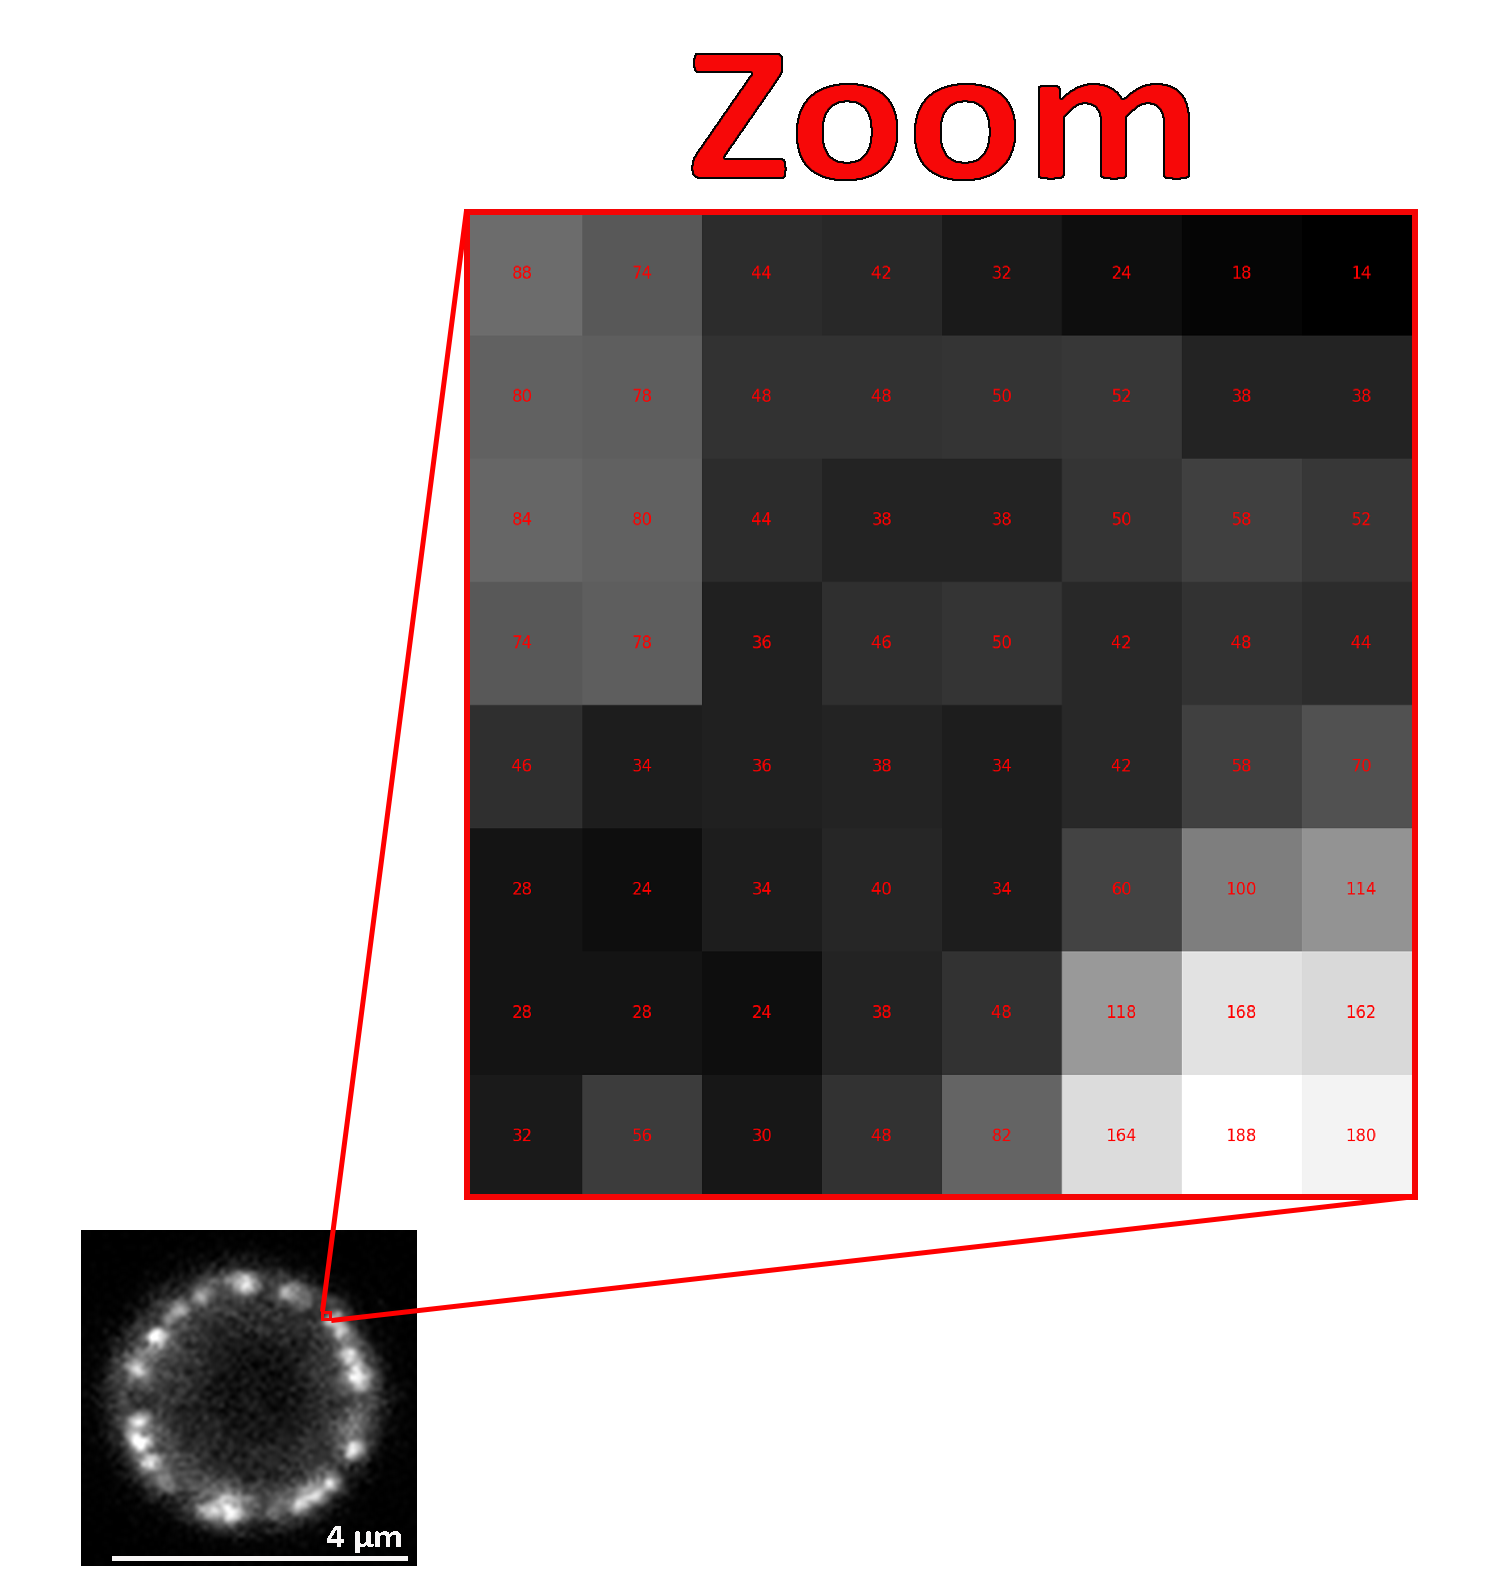

Figure 1. Microscopical image of the subcellular localization of PilA-GFP eisosomal protein [5], [6] in the conidiospore of fungus *Aspergillus nidulans* with a zoomed-in area (red inset) displaying the pixel values. Image was captured using a Leica TCS SP8 MP Multiphoton Microscope (figure provided by the author). 

<p style="text-align: justify;">In microscopy and specifically in fluorescence microscopical images are usually acquired without color information (using monochrome cameras or photomultipliers) and are (usually) visualized using a monochrome false-color LUT. Lookup tables (LUTs; sometimes alternatively called colour maps) determines how gray values are translated into a color value. To visualize microscopical images we often use shades of gray (gray LUT) or in case we want to increase the reader’s visual sensitivity to dim features we invert the image, mapping dark values to light and vice versa [4].  

All published microscopical images should contain a scale bar as a visual reference for the size of structures or features observed in the image.</div>

The dimensions of the images are: 589 x 589 pixels


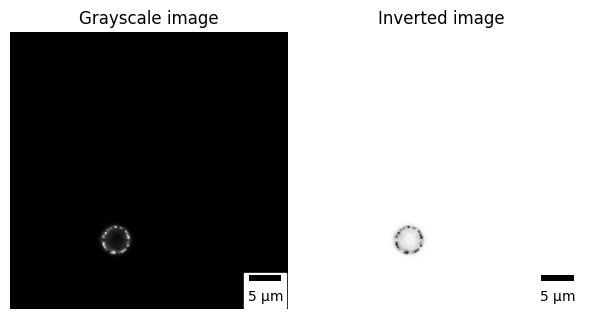

In [3]:
# Read the image using scikit-image
img = sk.io.imread("Single_channel_eisosome.tif")

# Print the dimensions of the image
print(f"The dimensions of the images are: {img.shape[0]} x {img.shape[1]} pixels")

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(6, 4))
# Plot the grayscale image in the first subplot

axs[0].imshow(img,cmap="gray")
axs[0].axis('off')

# Add a scale bar to the  subplot
scalebar = ScaleBar(0.0721501, 'um', length_fraction=0.2, height_fraction=0.02, location='lower right')
axs[0].add_artist(scalebar)
axs[0].set_title("Grayscale image")

# Plot the inverted grayscale image in the second subplot
axs[1].imshow(img,cmap="gray_r")
axs[1].axis('off')

# Add a scale bar to the  subplot
scalebar = ScaleBar(0.0721501, 'um', length_fraction=0.2, height_fraction=0.02, location='lower right')
axs[1].add_artist(scalebar)
axs[1].set_title("Inverted image")

# Adjust spacing between subplots
plt.tight_layout()

## Channels
<p style="text-align: justify;">In microscopy, different channels represent distinct spectral ranges used to capture and visualize specific components or structures in the sample. Each channel corresponds to a specific wavelength range or emission spectrum, enabling researchers to simultaneously image different molecules, structures, or events within the sample. To optimize visual recognition, the use of separate black and white channels is recommended for most fluorescent imaging applications. A final merged colored image can be created to show the overlay, ensuring accessibility for readers with common forms of color blindness. In the code below, we visualize the subcellular localization of PilA-GFP (using a grayscale lookup table) and Histone H1-mRFP (using a grayscale lookup table) as well as their overlay (PilA shown in magenta and Histone H1 in green) [7] in the conidiospore of A. nidulans</i>.</div>

The dimensions of the images are 589 x 589 pixels with 3 channels  


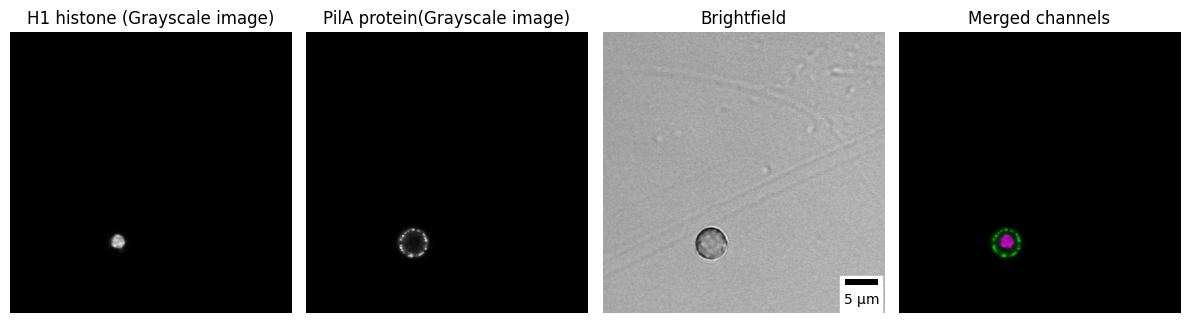

In [4]:
# Read the image using scikit-image
img = sk.io.imread("3_channel_eisosome.tif")

# Print the dimensions of the image
print(f"The dimensions of the images are {img.shape[0]} x {img.shape[1]} pixels with {img.shape[2]} channels  ")

# Separate the channels
h1_histone = img[:,:,0]
pila = img[:,:,1]
brightfield = img[:,:,2]

# Create a figure with four subplots
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

# Plot H1 histone  in the first subplot
axs[0].imshow(h1_histone,cmap="gray")
axs[0].axis('off')
axs[0].set_title("H1 histone (Grayscale image)")

# Plot the PilA in the second subplot
axs[1].imshow(pila,cmap="gray")
axs[1].axis('off')
axs[1].set_title("PilA protein(Grayscale image)")

# Plot the brightfield image in the third subplot with the scale bar 
axs[2].imshow(brightfield,cmap="gray")
axs[2].axis('off')
scalebar = ScaleBar(0.0721501, 'um', length_fraction=0.2, height_fraction=0.02, location='lower right')
axs[2].add_artist(scalebar)
axs[2].set_title("Brightfield")

# Convert the 2D slices to 3D arrays
h1_histone_3d = np.atleast_3d(img[:,:,0]) #converts the 2D slice to a 3D array
pila_3d = np.atleast_3d(img[:,:,1]) #converts the 2D slice to a 3D array

# Define the color
color_h1 = np.asarray([1, 0, 1]).reshape((1, 1, -1)) #creates a 1x1x3 array - Magenta color
color_pila = np.asarray([0, 1, 0]).reshape((1, 1, -1)) #creates a 1x1x3 array - Green color

#  Each pixel in the image  is multiplied by the  color.
h1_magenta =  h1_histone_3d * color_h1
pila_green = pila_3d * color_pila

# Merge the colored channels
merged = np.clip(h1_magenta + pila_green,0,255)

# Plot the merged channels in the fourth subplot
axs[3].imshow(merged)
axs[3].axis('off')
axs[3].set_title("Merged channels")

# Adjust spacing between subplots
plt.tight_layout()

## 4D Images (x,y, channels and Z-slices)
<p style="text-align: justify;">Very often in confocal microscopy we capture “slices” of images at different focal planes along the Z-axis (a Z-stack). These slices are then reconstructed into a 3D image by stacking them together. Z-stacks provide valuable insights into the spatial distribution, morphology, and relationships of structures within the sample in three dimensions.In the code below, we demonstrate the visualization of the subcellular localization of PilA-GFP and Histone H1-mRFP in the conidiospore of <i>A. nidulans</i> by capturing four "slices" along the Z-axis (In practice, the image below represents a hyperstack, a 4D composition consisting of x, y, z, and channels). This approach enables us to study the distribution and relationships of these proteins in three dimensions.</div>
   

The dimensions of the images are 589 x 589 pixels with 3 channels and 4 slices


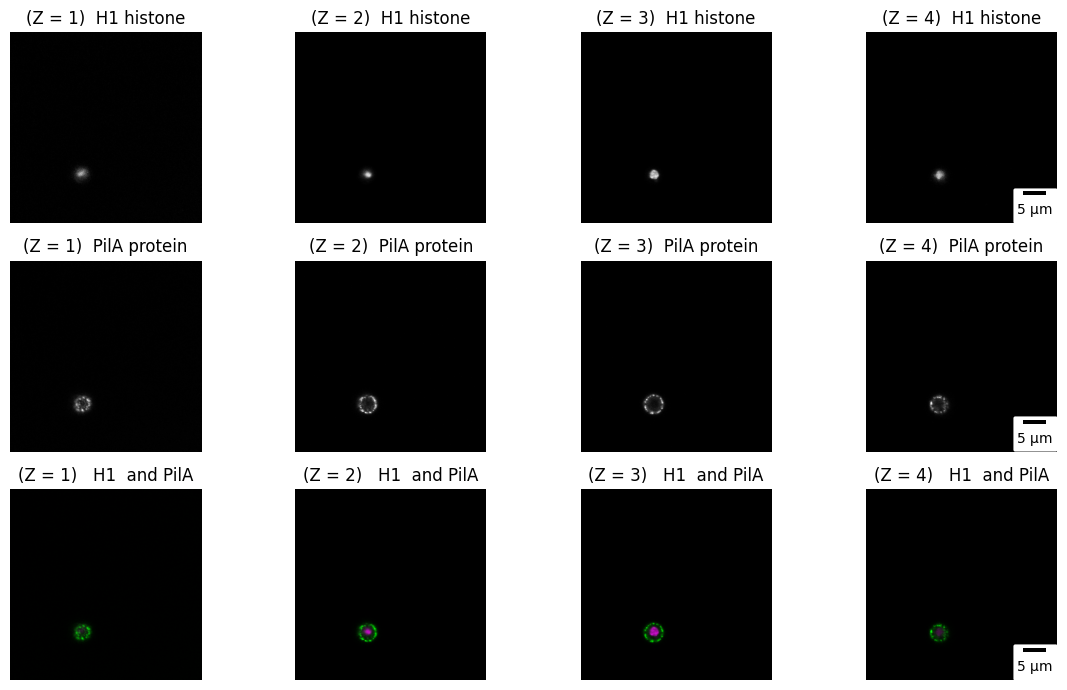

In [5]:
# Read the image using scikit-image
img = sk.io.imread("3_channel_zstack_eisosome.tif")

# Print the dimensions of the image
print(f"The dimensions of the images are {img.shape[1]} x {img.shape[2]} pixels with {img.shape[3]} channels and {img.shape[0]} slices")

# Separate the channels
h1_histone = img[:,:,:,0]
pila = img[:,:,:,1]
brightfield = img[:,:,:,2]

# Create a figure with subplots
fig, axs = plt.subplots(3, 4, figsize=(12, 7))


# Plot individual slices of H1 histone channel
for i in range(img.shape[0]):
    axs[0][i].imshow(h1_histone[i,:,:],cmap="gray")
    axs[0][i].axis('off')
    axs[0][i].set_title(f"(Z = {i+1})  H1 histone")
    scalebar = ScaleBar(0.0721501, 'um', length_fraction=0.2, height_fraction=0.02, location='lower right')
    axs[0, -1].add_artist(scalebar)
    
# Plot individual slices of PilA protein channel    
for i in range(img.shape[0]):
    axs[1][i].imshow(pila[i,:,:],cmap="gray")
    axs[1][i].axis('off')
    axs[1][i].set_title(f"(Z = {i+1})  PilA protein")
    scalebar = ScaleBar(0.0721501, 'um', length_fraction=0.2, height_fraction=0.02, location='lower right')
    axs[1, -1].add_artist(scalebar)

# Create merged images of H1 histone and PilA protein channels
for i in range(img.shape[0]):
    h1_histone_3d = np.atleast_3d(h1_histone[i,:,:]) #converts the 2D slice to a 3D array
    pila_3d = np.atleast_3d(pila[i,:,:]) #converts the 2D slice to a 3D array

    # Define the color
    color_h1 = np.asarray([1, 0, 1]).reshape((1, 1, -1)) #creates a 1x1x3 array - Magenta color
    color_pila = np.asarray([0, 1, 0]).reshape((1, 1, -1)) #creates a 1x1x3 array - Green color
    h1_magenta =  h1_histone_3d * color_h1
    pila_green = pila_3d * color_pila
    merged = np.clip(h1_magenta + pila_green,0,255)
    axs[2][i].imshow(merged)
    axs[2][i].axis('off')
    axs[2][i].set_title(rf"(Z = {i+1})   H1  and PilA")
    scalebar = ScaleBar(0.0721501, 'um', length_fraction=0.2, height_fraction=0.02, location='lower right')
    axs[2, -1].add_artist(scalebar)

# Adjust spacing between subplots
plt.tight_layout()

## Projections
<p style="text-align: justify;"> One way to visualize a Z-stack is to examine each slice individually, as demonstrated in the code above. However, this approach becomes cumbersome when dealing with multiple slices. An efficient method to summarize the information in a Z-stack is by computing a z-projection [3]. By performing a z-projection, we can generate various types of projections based on the specific question we seek to answer. For instance, we can obtain a maximum, minimum, mean, or standard deviation projection. In a maximum projection, a 2D image is created to represent the maximum intensity, capturing the brightest feature, along a specific axis, typically the z-axis. Similarly, in mean, minimum, and standard deviation projections, we generate 2D images that represent the mean, minimum, or spread of intensities, respectively, along a specific axis.</div>

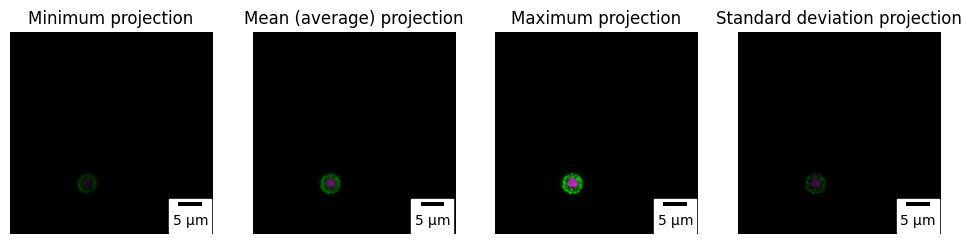

In [25]:
# Read the image using scikit-image
img = sk.io.imread("3_channel_zstack_eisosome.tif")

# Separate the channels
h1_histone = img[:,:,:,0]
pila = img[:,:,:,1]
brightfield = img[:,:,:,2]

# Create a figure with subplots
fig, axs = plt.subplots(1, 4, figsize=(12, 7))

# List contaning he names of the projections to be   displayed
projections = ['Minimum projection', 'Mean (average) projection', 'Maximum projection', 'Standard deviation projection']

# List contaning he names of the projections to be computed
np_projection = [np.min, np.mean, np.max, np.std]


# Compute projections; retain the same dtype in the output
for i in range(len(projections)):
    h1_histone_3d = np.atleast_3d(np_projection[i](h1_histone, axis=0).astype(h1_histone.dtype)) #converts the 2D slice to a 3D array
    pila_3d = np.atleast_3d(np_projection[i](pila, axis=0).astype(pila.dtype)) #converts the 2D slice to a 3D array
    color_h1 = np.asarray([1, 0, 1]).reshape((1, 1, -1)) #creates a 1x1x3 array - Magenta color
    color_pila = np.asarray([0, 1, 0]).reshape((1, 1, -1)) #creates a 1x1x3 array - Green color
    h1_magenta =  h1_histone_3d * color_h1
    pila_green = pila_3d * color_pila
    merged = np.clip(h1_magenta + pila_green,0,255)
    axs[i].imshow(merged)
    scalebar = ScaleBar(0.0721501, 'um', length_fraction=0.2, height_fraction=0.02, location='lower right')
    axs[i].add_artist(scalebar)
    axs[i].axis('off')
    axs[i].set_title(projections[i])

## 5D Images (x,y, channels, Z-slices and time)
<p style="text-align: justify;"> Confocal 5D imaging is a valuable tool in biology, offering remarkable insights into dynamic processes at the cellular and subcellular levels. These images comprise x, y, z slices, channels along with time, enabling the visualization and analysis of temporal changes. In the following code, we demonstrate the significance of confocal 5D imaging by presenting maximum projections of PilA-GFP and Histone H1-mRFP (merged image) at each time point, with each time point representing approximately 20 minutes.</div>

The dataset has 589 x 589 pixels with 3 channels, 4 slices and 37 time points


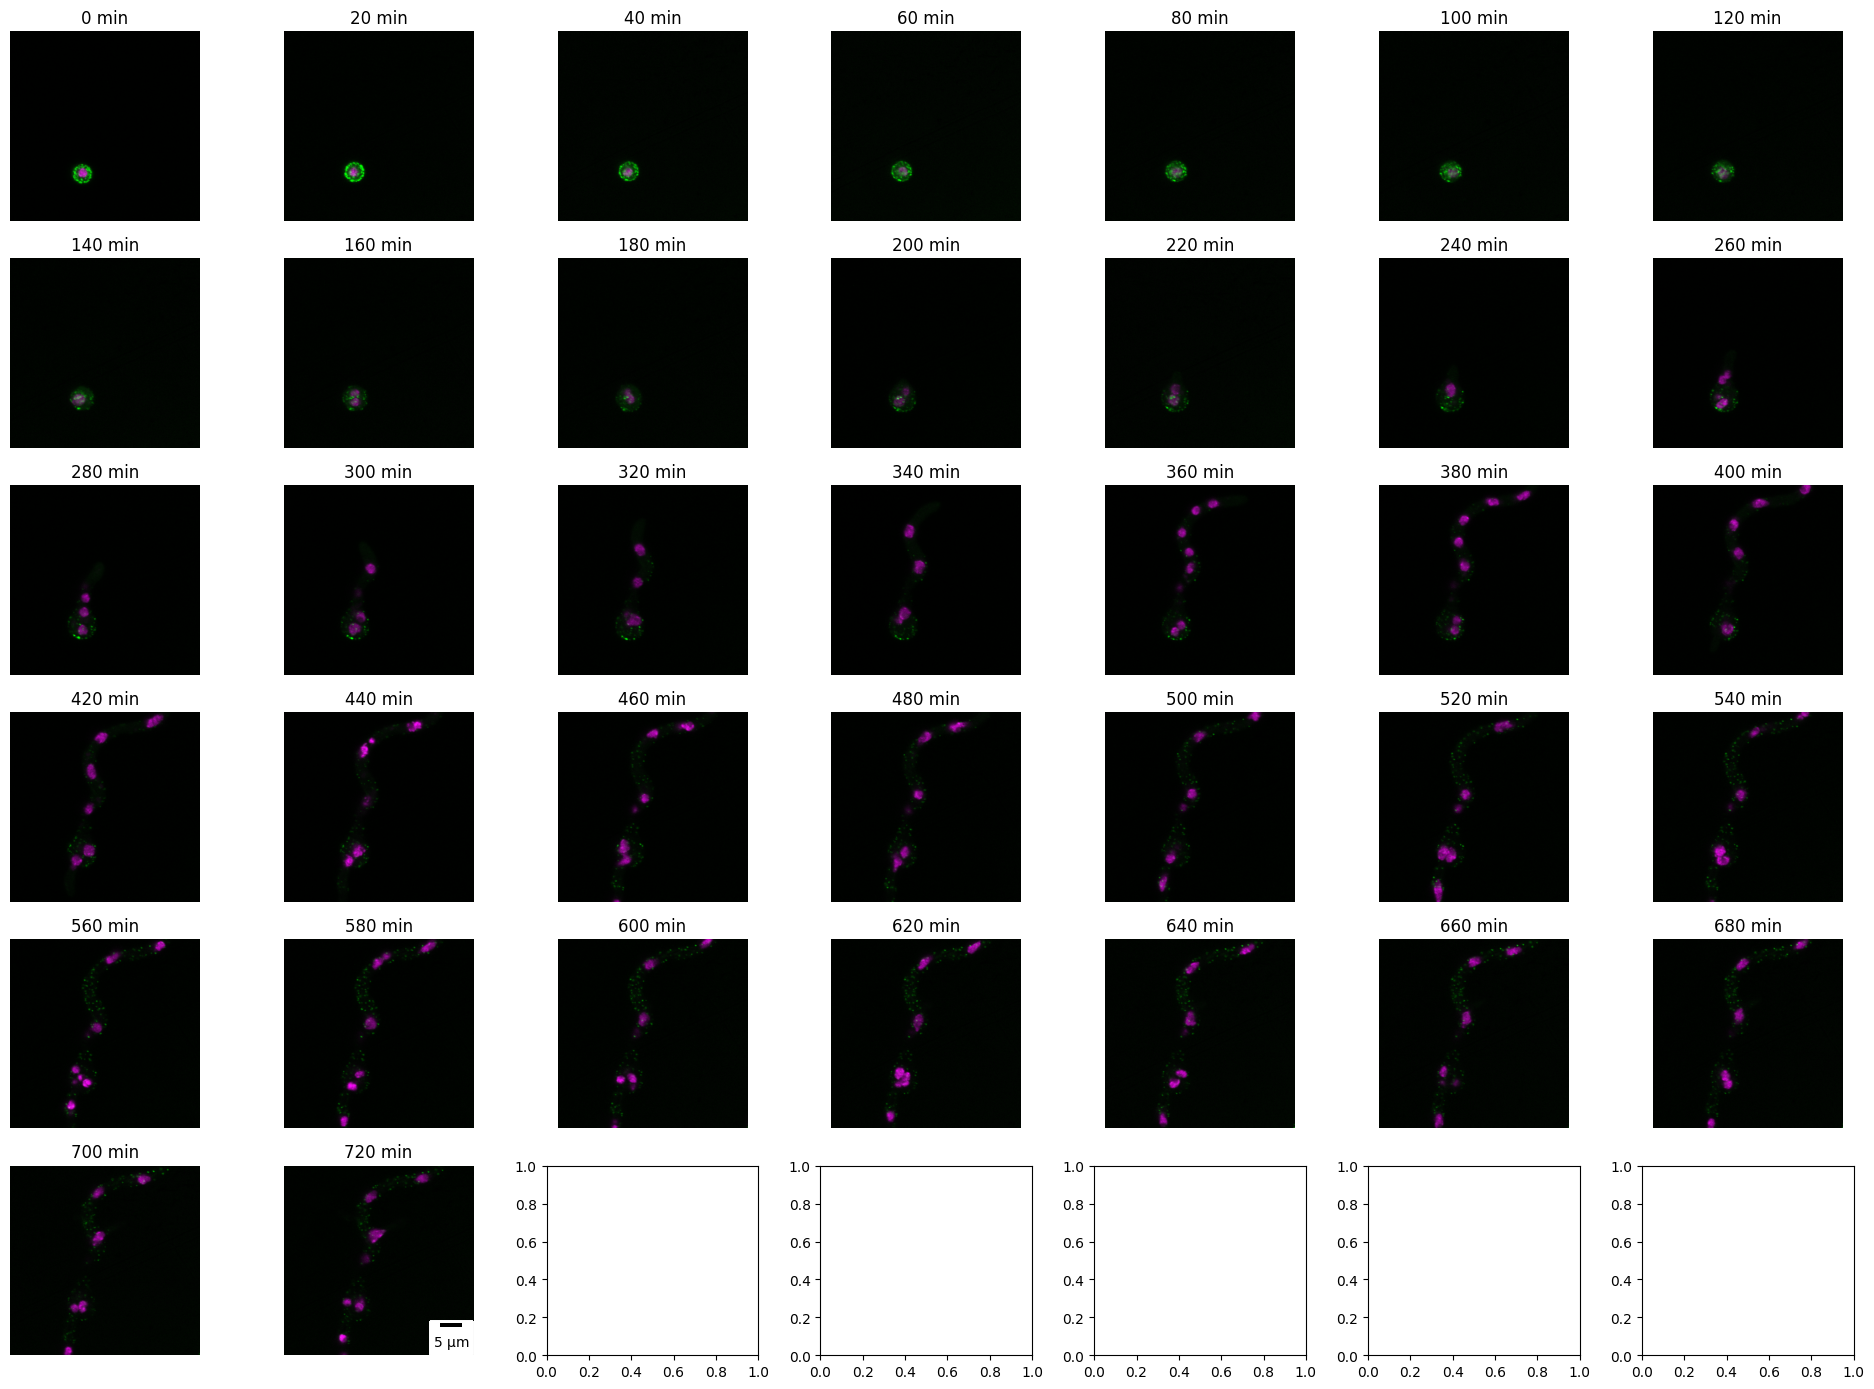

In [26]:
# Read the 5D image stack using scikit-image
img = sk.io.imread("3_channel_zstack_time_eisosome.tif")
print(f"The dataset has {img.shape[2]} x {img.shape[3]} pixels with {img.shape[4]} channels, {img.shape[1]} slices and {img.shape[0]} time points")

# Separate the channels 
h1_histone = img[:,:,:,:,0]
pila = img[:,:,:,:,1]
brightfield = img[:,:,:,:,2]

# Create a figure with subplots
fig, axs = plt.subplots(6, 7, figsize=(19,14))

# Compute projections (retain the same dtype in the output) and create merged images for each time point
time =0
for i in range (img.shape[0]):
    # Compute maximum projection for H1 histone channel
    h1_histone_3d = np.atleast_3d(np.max(h1_histone[i,:,:,:], axis=0).astype(h1_histone.dtype))
    # Compute maximum projection for PilA channel
    pila_3d = np.atleast_3d(np.max(pila[i,:,:,:], axis=0).astype(pila.dtype))
    # Compute minimum projection for brightfield channel
    brightfield_3d = np.atleast_3d(np.min(brightfield[i,:,:,:], axis=0).astype(brightfield.dtype)) 
    
    # Define colors for each channel
    color_h1 = np.asarray([1, 0, 1]).reshape((1, 1, -1)) #creates a 1x1x3 array - Magenta color
    color_pila = np.asarray([0, 1, 0]).reshape((1, 1, -1)) #creates a 1x1x3 array - Green color
    color_brightfield = np.asarray([0.5, 0.5, 0.5]).reshape((1, 1, -1)) #creates a 1x1x3 array - Gray color
    
     # Create merged image by combining the channels
    h1_magenta =  h1_histone_3d * color_h1
    pila_green = pila_3d * color_pila
    brightfield_gray = brightfield_3d* color_brightfield
    # merged = np.clip(h1_magenta + pila_green+brightfield_gray,0,255)
    merged = np.clip(h1_magenta + pila_green,0,255)

# Plot the merged image in the corresponding subplot
    axs[i // 7, i % 7].imshow(merged)
    axs[i // 7, i % 7].axis('off')
    axs[i // 7, i % 7].set_title(f"{time} min")
    scalebar = ScaleBar(0.0721501, 'um', length_fraction=0.2, height_fraction=0.02, location='lower right')
    axs[5, 1].add_artist(scalebar)
    time +=20

plt.tight_layout()
plt.show()

Displaying (below) a brightfield slice of fungus *A. nidulans* at different time points.

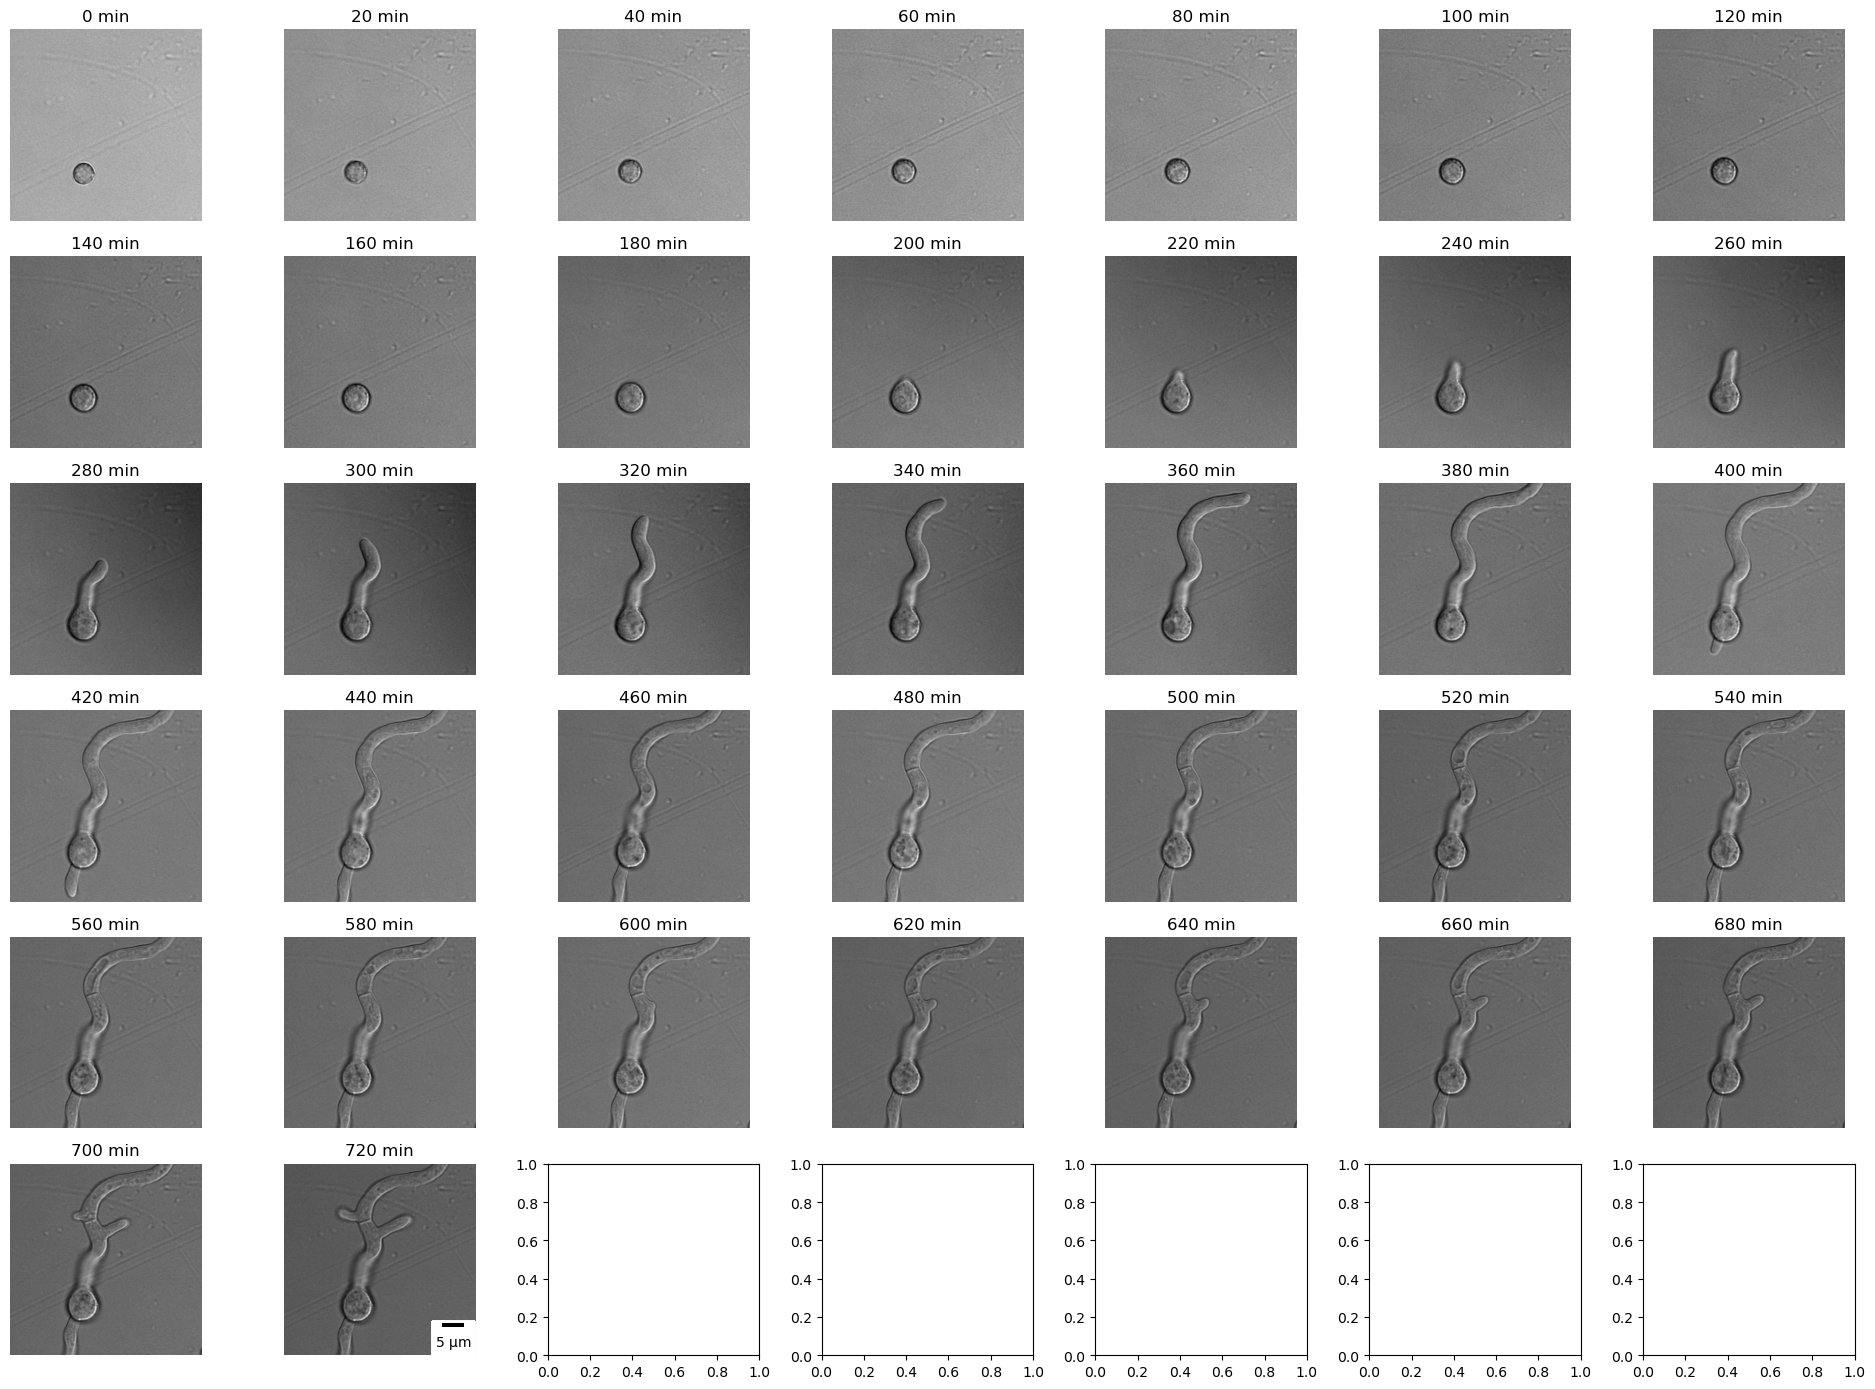

In [2]:
# Read the 5D image stack using scikit-image
img = sk.io.imread("3_channel_zstack_time_eisosome.tif")

# Separate the channels 
h1_histone = img[:,:,:,:,0]
pila = img[:,:,:,:,1]
brightfield = img[:,:,:,:,2]


# Create a figure with subplots
fig, axs = plt.subplots(6, 7, figsize=(19,14))

# Compute projections (retain the same dtype in the output) and create merged images for each time point
time =0
for i in range (img.shape[0]):
#     Select a slice of the Brihgtfield channel
    brightfield_2_slice =  brightfield[i,2,:,:]
# Plot the second slice in the corresponding subplot
    axs[i // 7, i % 7].imshow(brightfield_2_slice, cmap="gray")
    axs[i // 7, i % 7].axis('off')
    axs[i // 7, i % 7].set_title(f"{time} min")
    scalebar = ScaleBar(0.0721501, 'um', length_fraction=0.2, height_fraction=0.02, location='lower right')
    axs[5, 1].add_artist(scalebar)
    time +=20

plt.tight_layout()
plt.show()

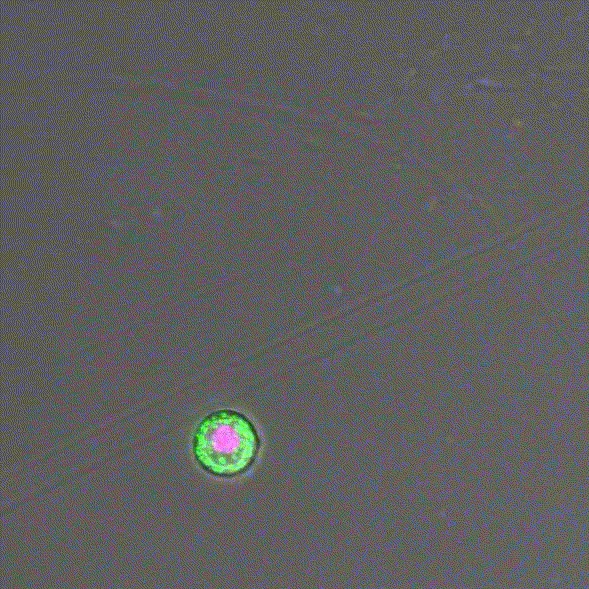


GIF image representing the growth of a conidiospore of *A. nidulans* expressing PilA-GFP (green) and Histone H1-mRFP (magenta) over a period 12 hours (at 28 degrees Celsius)."

## Conclusions

<p style="text-align: justify;">
In this tutorial, we will delve into the process of reading and visualizing intricate light microscope images with various dimensions, including 2D, 3D, 4D, and 5D. Although, matplotlib is a powerful library for data visualization, it may not be the most suitable choice for visualizing 3D, 4D, and 5D images, such as microscopical images. While matplotlib can handle 2D images effectively, visualizing higher-dimensional images can be challenging and limited. However, there are solutions:  
    
- <b> Microfilm</b> [9], [10], which simplifies the plotting of multi-channel images   
- and  <b> Napari </b> [8], a popular Python library specifically designed for visualizing and exploring multidimensional scientific data, including microscopical images. Napari provides an interactive and versatile interface that goes beyond the capabilities of matplotlib.
    
In our upcoming tutorial, we will delve into Napari and explore its features in detail to better understand its capabilities for visualizing higher-dimensional images.</div>


I have prepared a Jupyter Notebook to accompany this blog post, which can be viewed in my [GitHub](url_here).

![SegmentLocal](Animated_logo_smaller_faster.gif "segment")

## References:
[1]	C. T. Rueden and K. W. Eliceiri, “Visualization approaches for multidimensional biological image data,” BioTechniques, vol. 43, no. 1S, pp. S31–S36, Jul. 2007, doi: 10.2144/000112511.  

[2]	J. B. Pawley, “Points, Pixels, and Gray Levels: Digitizing Image Data,” in Handbook Of Biological Confocal Microscopy, J. B. Pawley, Ed., Boston, MA: Springer US, 2006, pp. 59–79. doi: 10.1007/978-0-387-45524-2_4.  

[3]	P. Bankhead, “Introduction to Bioimage Analysis — Introduction to Bioimage Analysis.” https://bioimagebook.github.io/index.html (accessed Jun. 29, 2023).  

[4]	J. Johnson, “Not seeing is not believing: improving the visibility of your fluorescence images,” Mol. Biol. Cell, vol. 23, no. 5, pp. 754–757, Mar. 2012, doi: 10.1091/mbc.e11-09-0824.  

[5]	I. Vangelatos, K. Roumelioti, C. Gournas, T. Suarez, C. Scazzocchio, and V. Sophianopoulou, “Eisosome Organization in the Filamentous AscomyceteAspergillus nidulans,” Eukaryot. Cell, vol. 9, no. 10, pp. 1441–1454, Oct. 2010, doi: 10.1128/EC.00087-10.  

[6]	A. Athanasopoulos, C. Gournas, S. Amillis, and V. Sophianopoulou, “Characterization of AnNce102 and its role in eisosome stability and sphingolipid biosynthesis,” Sci. Rep., vol. 5, no. 1, Dec. 2015, doi: 10.1038/srep15200. 

[7]	A. P. Mela and M. Momany, “Internuclear diffusion of histone H1 within cellular compartments of Aspergillus nidulans,” PloS One, vol. 13, no. 8, p. e0201828, 2018, doi: 10.1371/journal.pone.0201828.  

[8]	“napari: a fast, interactive viewer for multi-dimensional images in Python — napari.” https://napari.org/stable/ (accessed Jul. 04, 2023).  

[9]	G. Witz, “microfilm.” Jun. 27, 2023. Accessed: Jul. 14, 2023. [Online]. Available: https://github.com/guiwitz/microfilm  

[10]	“Bio-image Analysis Notebooks — Bio-image Analysis Notebooks.” https://haesleinhuepf.github.io/BioImageAnalysisNotebooks/intro.html (accessed Jul. 14, 2023).


